In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, f1_score, recall_score, confusion_matrix, silhouette_score, davies_bouldin_score, calinski_harabasz_score, r2_score
import time
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [59]:
df = pd.read_csv('auto-mpg.csv')

In [60]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,NaN,79,2625,18.6,82,1,ford ranger


In [61]:
df.isna().sum()
# Considering its only 4 rows, we can go ahead and drop it 

mpg             0
cylinders       0
displacement    1
horsepower      1
weight          0
acceleration    2
model year      0
origin          0
car name        0
dtype: int64

In [62]:
df = df[~df['displacement'].isna()]

In [63]:
df = df[~df['horsepower'].isna()]
df = df[~df['acceleration'].isna()]

In [64]:
df[df.duplicated()]
# no duplicates

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [65]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [66]:
df1 = df.select_dtypes(include = ['int','float'])

In [67]:
dicti = {}

for i in df1.columns:


    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)

    dicti[i] = df1[(df1[i] < lower_limit) | (df1[i] > upper_limit)].count()[0]

C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_10348\2289933199.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dicti[i] = df1[(df1[i] < lower_limit) | (df1[i] > upper_limit)].count()[0]
C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_10348\2289933199.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dicti[i] = df1[(df1[i] < lower_limit) | (df1[i] > upper_limit)].count()[0]
C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_10348\2289933199.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

In [68]:
dicti
# There are 10 outliers in acceleration

{'mpg': 0,
 'cylinders': 0,
 'displacement': 0,
 'weight': 0,
 'acceleration': 10,
 'model year': 0,
 'origin': 0}

In [69]:
Q1 = df['acceleration'].quantile(0.25)
Q3 = df['acceleration'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

df[(df['acceleration'] < lower_limit) | (df['acceleration'] > upper_limit)] = df['acceleration'].mean()
# Replacing outliers with the mean

C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_10348\166276614.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15.55786802030457' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[(df['acceleration'] < lower_limit) | (df['acceleration'] > upper_limit)] = df['acceleration'].mean()


In [70]:

df = df.round(2)

In [71]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,23.196447,5.722335,189.520558,2904.024365,15.475381,74.488832,1.930457
std,7.731735,2.308607,106.028500,958.996714,2.471871,10.180457,2.342130
min,9.000000,3.000000,15.560000,15.560000,9.000000,15.560000,1.000000
25%,16.925000,4.000000,98.000000,2206.250000,14.000000,73.000000,1.000000
50%,22.000000,4.000000,146.000000,2789.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,260.000000,3573.000000,17.000000,79.000000,2.000000
max,46.600000,15.560000,455.000000,5140.000000,21.900000,82.000000,15.560000


In [72]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140,3449.0,10.5,70.0,1.0,ford torino


In [73]:
df.shape

(394, 9)

<Figure size 1500x900 with 0 Axes>

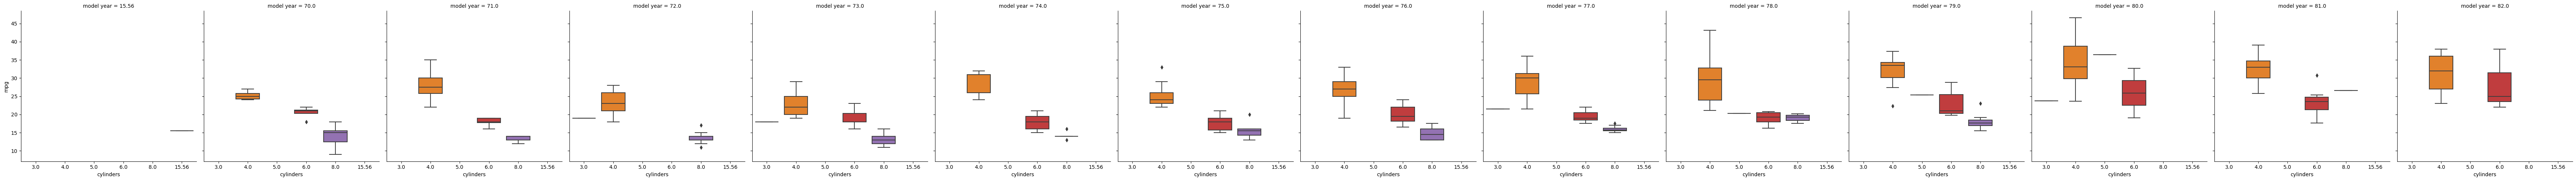

In [74]:
plt.figure(figsize = (10,6), dpi = 150)
sns.catplot(data = df, x = 'cylinders',y='mpg', kind = 'box', col = 'model year')

<Axes: xlabel='cylinders', ylabel='mpg'>

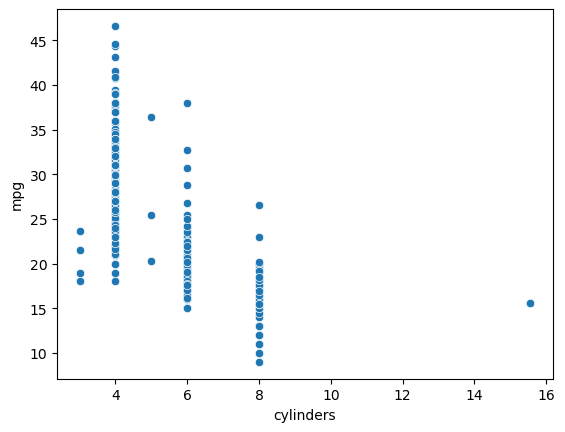

In [75]:
sns.scatterplot(data = df, x = 'cylinders',y='mpg')

In [76]:
df = df[~(df['model year'] == 15.56)]
# error value

In [77]:
df.corr(numeric_only = True)
# All columns have good correlation value with MPG 

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.779943,-0.807973,-0.837859,0.397911,0.571302,0.566012
cylinders,-0.779943,1.000000,0.950939,0.896567,-0.508801,-0.345171,-0.566206
displacement,-0.807973,0.950939,1.000000,0.933495,-0.539155,-0.362135,-0.616399
weight,-0.837859,0.896567,0.933495,1.000000,-0.416182,-0.305548,-0.586527
acceleration,0.397911,-0.508801,-0.539155,-0.416182,1.000000,0.260375,0.218500
model year,0.571302,-0.345171,-0.362135,-0.305548,0.260375,1.000000,0.172588
origin,0.566012,-0.566206,-0.616399,-0.586527,0.218500,0.172588,1.000000


In [78]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu


In [82]:
label = LabelEncoder()
df['car name'] = label.fit_transform(df['car name'])

C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_10348\1472196544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car name'] = label.fit_transform(df['car name'])


In [84]:
df['car_actual_names'] = label.inverse_transform(df['car name'])

C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_10348\303220450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_actual_names'] = label.inverse_transform(df['car name'])


In [86]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car_actual_names
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1.0,47,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1.0,34,buick skylark 320
2,18.0,8.0,318.0,150,3436.0,11.0,70.0,1.0,225,plymouth satellite
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1.0,13,amc rebel sst
4,17.0,8.0,302.0,140,3449.0,10.5,70.0,1.0,156,ford torino


In [87]:
df.drop(columns = {'car_actual_names'}, inplace = True)

C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_10348\1177124999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = {'car_actual_names'}, inplace = True)


In [94]:
for i in df.columns:
    print(i,': ',df[i].unique())

mpg :  [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 24.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1 39.
 35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4 34.
 38. ]
cylinders :  [8. 4. 6. 3. 5.]
displacement :  [307.  350.  318.  304.  302.  429.  454.  455.  383.  400.  113.  198.
 199.  200.   97.  110.  107.  104.  360.  140.  232.  225.  250.  351.
 258.  122.  116.   79.   88.   71.   72.   91.   97.5  70.  121.  120.
  96.   98.  440.  108.  155.   68.  114.  156.   76.   83.   90.  231.
 262.  134.  119

In [96]:
df= df[~(df['horsepower'] == '?')]
# another error value

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           379 non-null    float64
 1   cylinders     379 non-null    float64
 2   displacement  379 non-null    float64
 3   horsepower    379 non-null    object 
 4   weight        379 non-null    float64
 5   acceleration  379 non-null    float64
 6   model year    379 non-null    float64
 7   origin        379 non-null    float64
 8   car name      379 non-null    int32  
dtypes: float64(7), int32(1), object(1)
memory usage: 28.1+ KB


In [98]:
X = df.drop(columns = {'mpg'})
y = df['mpg']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [100]:
D_tree = DecisionTreeRegressor(max_features = 'log2')

In [101]:
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_features='log2')

In [102]:
y_pred = D_tree.predict(X_test)

In [103]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [104]:
mse,rmse,r2

(15.042315789473683, 3.878442443748996, 0.7294978455972079)